In [5]:
%matplotlib inline 
import os
import numpy as np
import tensorflow as tf
import pymongo as pm
import gridfs
import cPickle
import scipy.signal as signal
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook, trange
from assignment_utils import *

In [6]:
from model_switcher import *

In [7]:
colorful_model = model_switcher(model_name = 'colorful_model',
                          data_name = 'cifar10',
                          loss_name = 'colorful_loss',
                          exp_id  = 'experiment2')

In [334]:
coll, db = p_get_coll(vars(colorful_model)['collname'], vars(colorful_model)['dbname'])
print(coll)

coll.distinct('exp_id')

Collection(Database(MongoClient(host=['localhost:24444'], document_class=dict, tz_aware=False, connect=True), u'cifar10'), u'colorful_model_colorful_loss.files')


[u'experiment26']

In [333]:
del_cols = [u'experiment19',
 u'experiment19_help',
 u'experiment20',
 u'experiment21',
 u'experiment22',
 u'experiment23',
 u'experiment24',
 u'experiment25']
for d in del_cols:
    coll.delete_many({'exp_id':d})

experiment26
experiment26


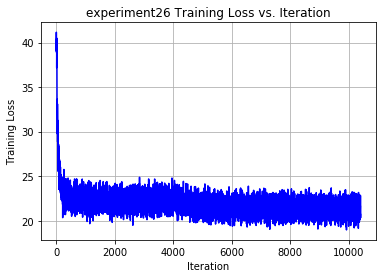

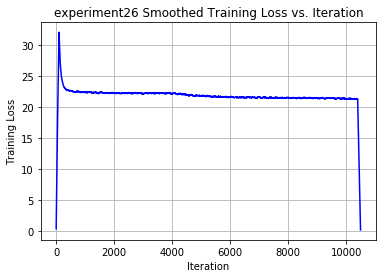

In [269]:
# TODO Double check this. Bit hacky

print(coll.distinct('exp_id')[-1])
texp_id = coll.distinct('exp_id')[-1]
print(texp_id)
p22_training(texp_id,coll)

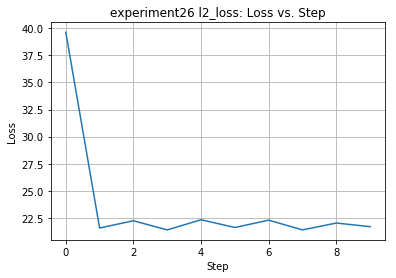

In [270]:
l2_loss, img_inputs, img_prediction = get_validation_data(texp_id, coll)
plot_l2_loss(l2_loss, texp_id)

np_inputs = np.array(img_inputs).transpose([0,2,3,4,1])
np_prediction = np.array(img_prediction).transpose([0,2,3,4,1])
my_shape = np_inputs.shape

In [271]:
np.array(img_prediction).shape

(10, 64, 24, 24, 3)

In [272]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

In [273]:
def show_row(in_row, num_show = None):
    if num_show is None:
        num_show = len(in_row)
    fig = figure(figsize = [20, 6])
    for i in range(num_show):
        a = fig.add_subplot(1,num_show, i+1)
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)
        imshow(in_row[:,:,:,i])

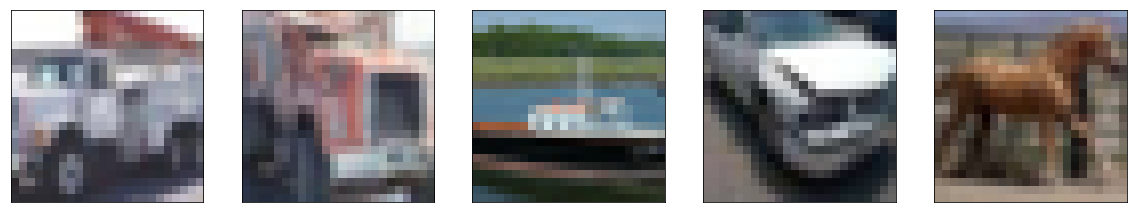

In [274]:
show_row(np_inputs[-1,:].squeeze(), 5)

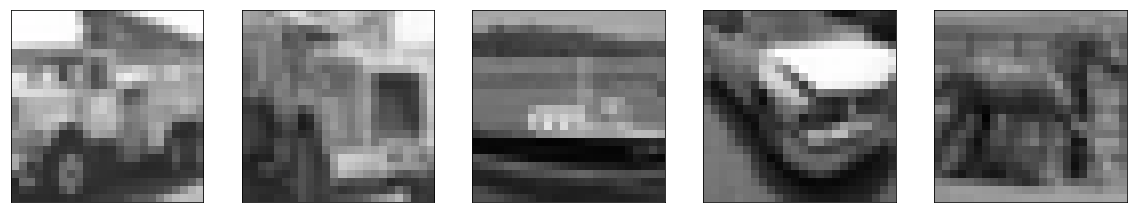

In [275]:
show_row(np_prediction[-1,:].squeeze(), 5)

In [276]:
from color_utils import preprocess, decode

In [277]:
np_prediction[-1,0].shape

(24, 3, 64)

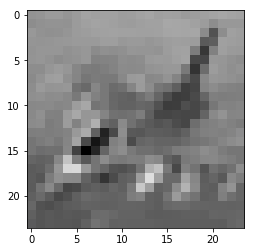

In [278]:
plt.imshow(np_prediction[2,:,:,:,0])

In [279]:
inp_d = np.array(img_inputs)
out_d = np.array(img_prediction)

In [280]:
inp_d.shape

(10, 64, 24, 24, 3)

In [281]:
data_l_in, gt_313_in, prior_in = preprocess(inp_d[-1,:,:,:,:])

In [282]:
data_l_out, gt_313_out, prior_out = preprocess(out_d[-1,:,:,:,:])

In [283]:
prior_in.sum()

15124.969

In [284]:
gt_313_out.shape

(64, 6, 6, 313)

In [287]:
prior_out.sum()

3043.5317

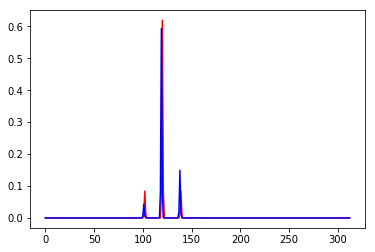

In [288]:
plt.plot(gt_313_out[0,3,0,:], color='red')
plt.plot(gt_313_in[0,3,0,:], color='blue')

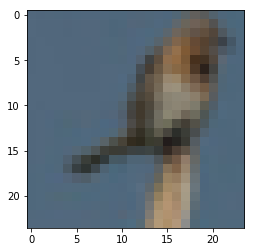

In [289]:
plt.imshow(inp_d[2,10,:,:,:])

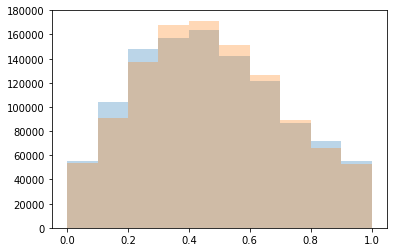

In [290]:
plt.hist(inp_d.flatten(), alpha=0.3);
plt.hist(out_d.flatten(), alpha=0.3);

In [291]:
inp_rec = decode(data_l_in, gt_313_in)
out_rec = decode(data_l_out, gt_313_out)

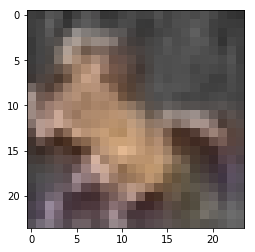

In [328]:
plt.imshow(inp_rec[-1,:,:,:])

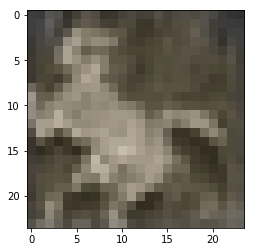

In [329]:
plt.imshow(out_rec[-1,:,:,:])

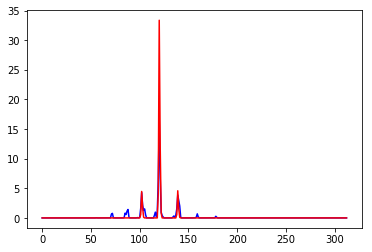

In [305]:
plt.plot(gt_313_in[:,i,j,:].sum(axis=0), color='blue')
plt.plot(gt_313_out[:,i,j,:].sum(axis=0), color='red')

In [306]:
dist_true = np.zeros(313)
dist_pred = np.zeros(313)
for i in range(6):
    for j in range(6):
        dist_true += gt_313_in[:,i,j,:].sum(axis=0)
        dist_pred += gt_313_out[:,i,j,:].sum(axis=0)

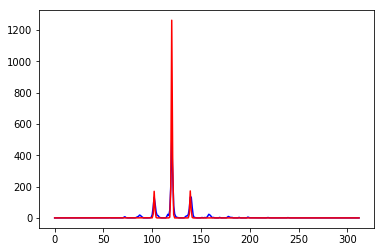

In [307]:
plt.plot(dist_true, color='blue')
plt.plot(dist_pred, color='red')

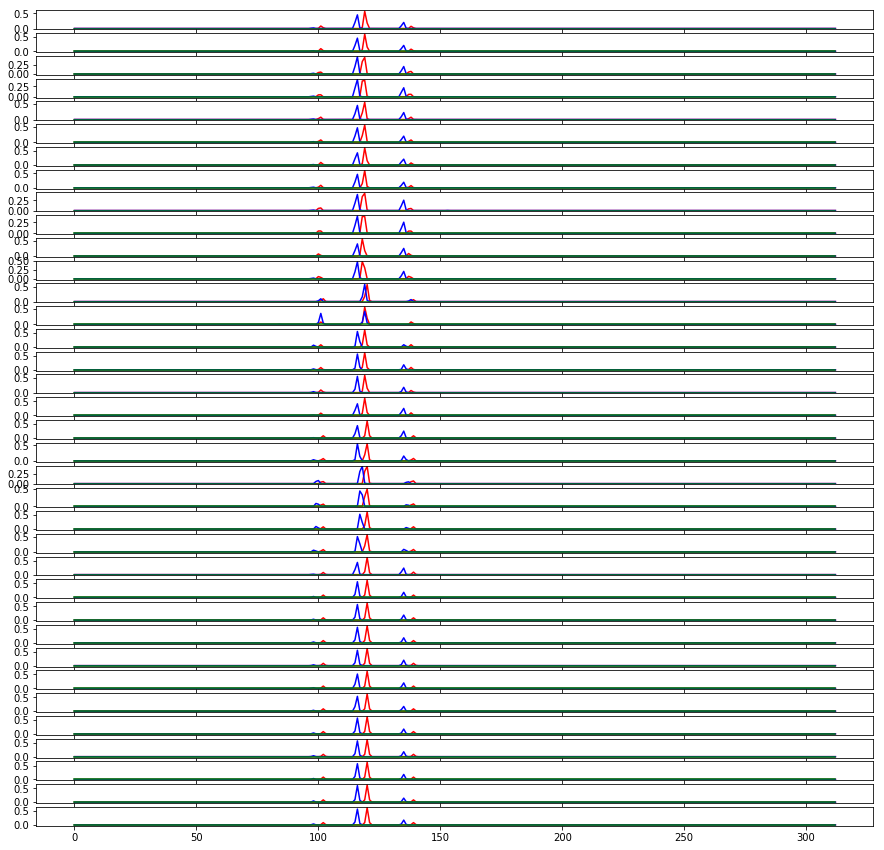

In [308]:
f, axes = plt.subplots(6*6, sharex=True, sharey=False, figsize=(15, 15))
for i in range(6):
    for j in range(6):
        axes[i*6 + j].plot(gt_313_out[12,i,j,:], color='red')
        axes[i*6 + j].plot(gt_313_in[12,i,j,:], color='blue')
        #axes[i*6 + j].plot(prior, color='green')
        axes[i*6 + j].plot(gt_313_in[12,i,j,:] - gt_313_in[12,i,j,:], color='green')

In [237]:
prior = np.load('prior_probs.npy')

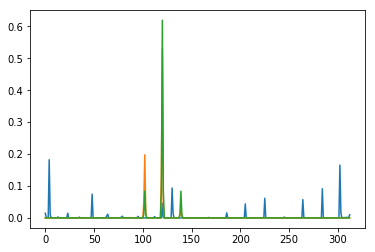

In [238]:
plt.plot(prior)
plt.plot(gt_313_in[12,i,j,:])
plt.plot(gt_313_out[12,i,j,:])